### Importando os pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # visualização gráfica
import statsmodels.api as sm # estimação de modelos

### Fazendo download da base de dados da UCI

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

### Analisando o dataset

In [3]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

### Utilizando o boxplot para verificar a distribuição das observações das nossas variáveis

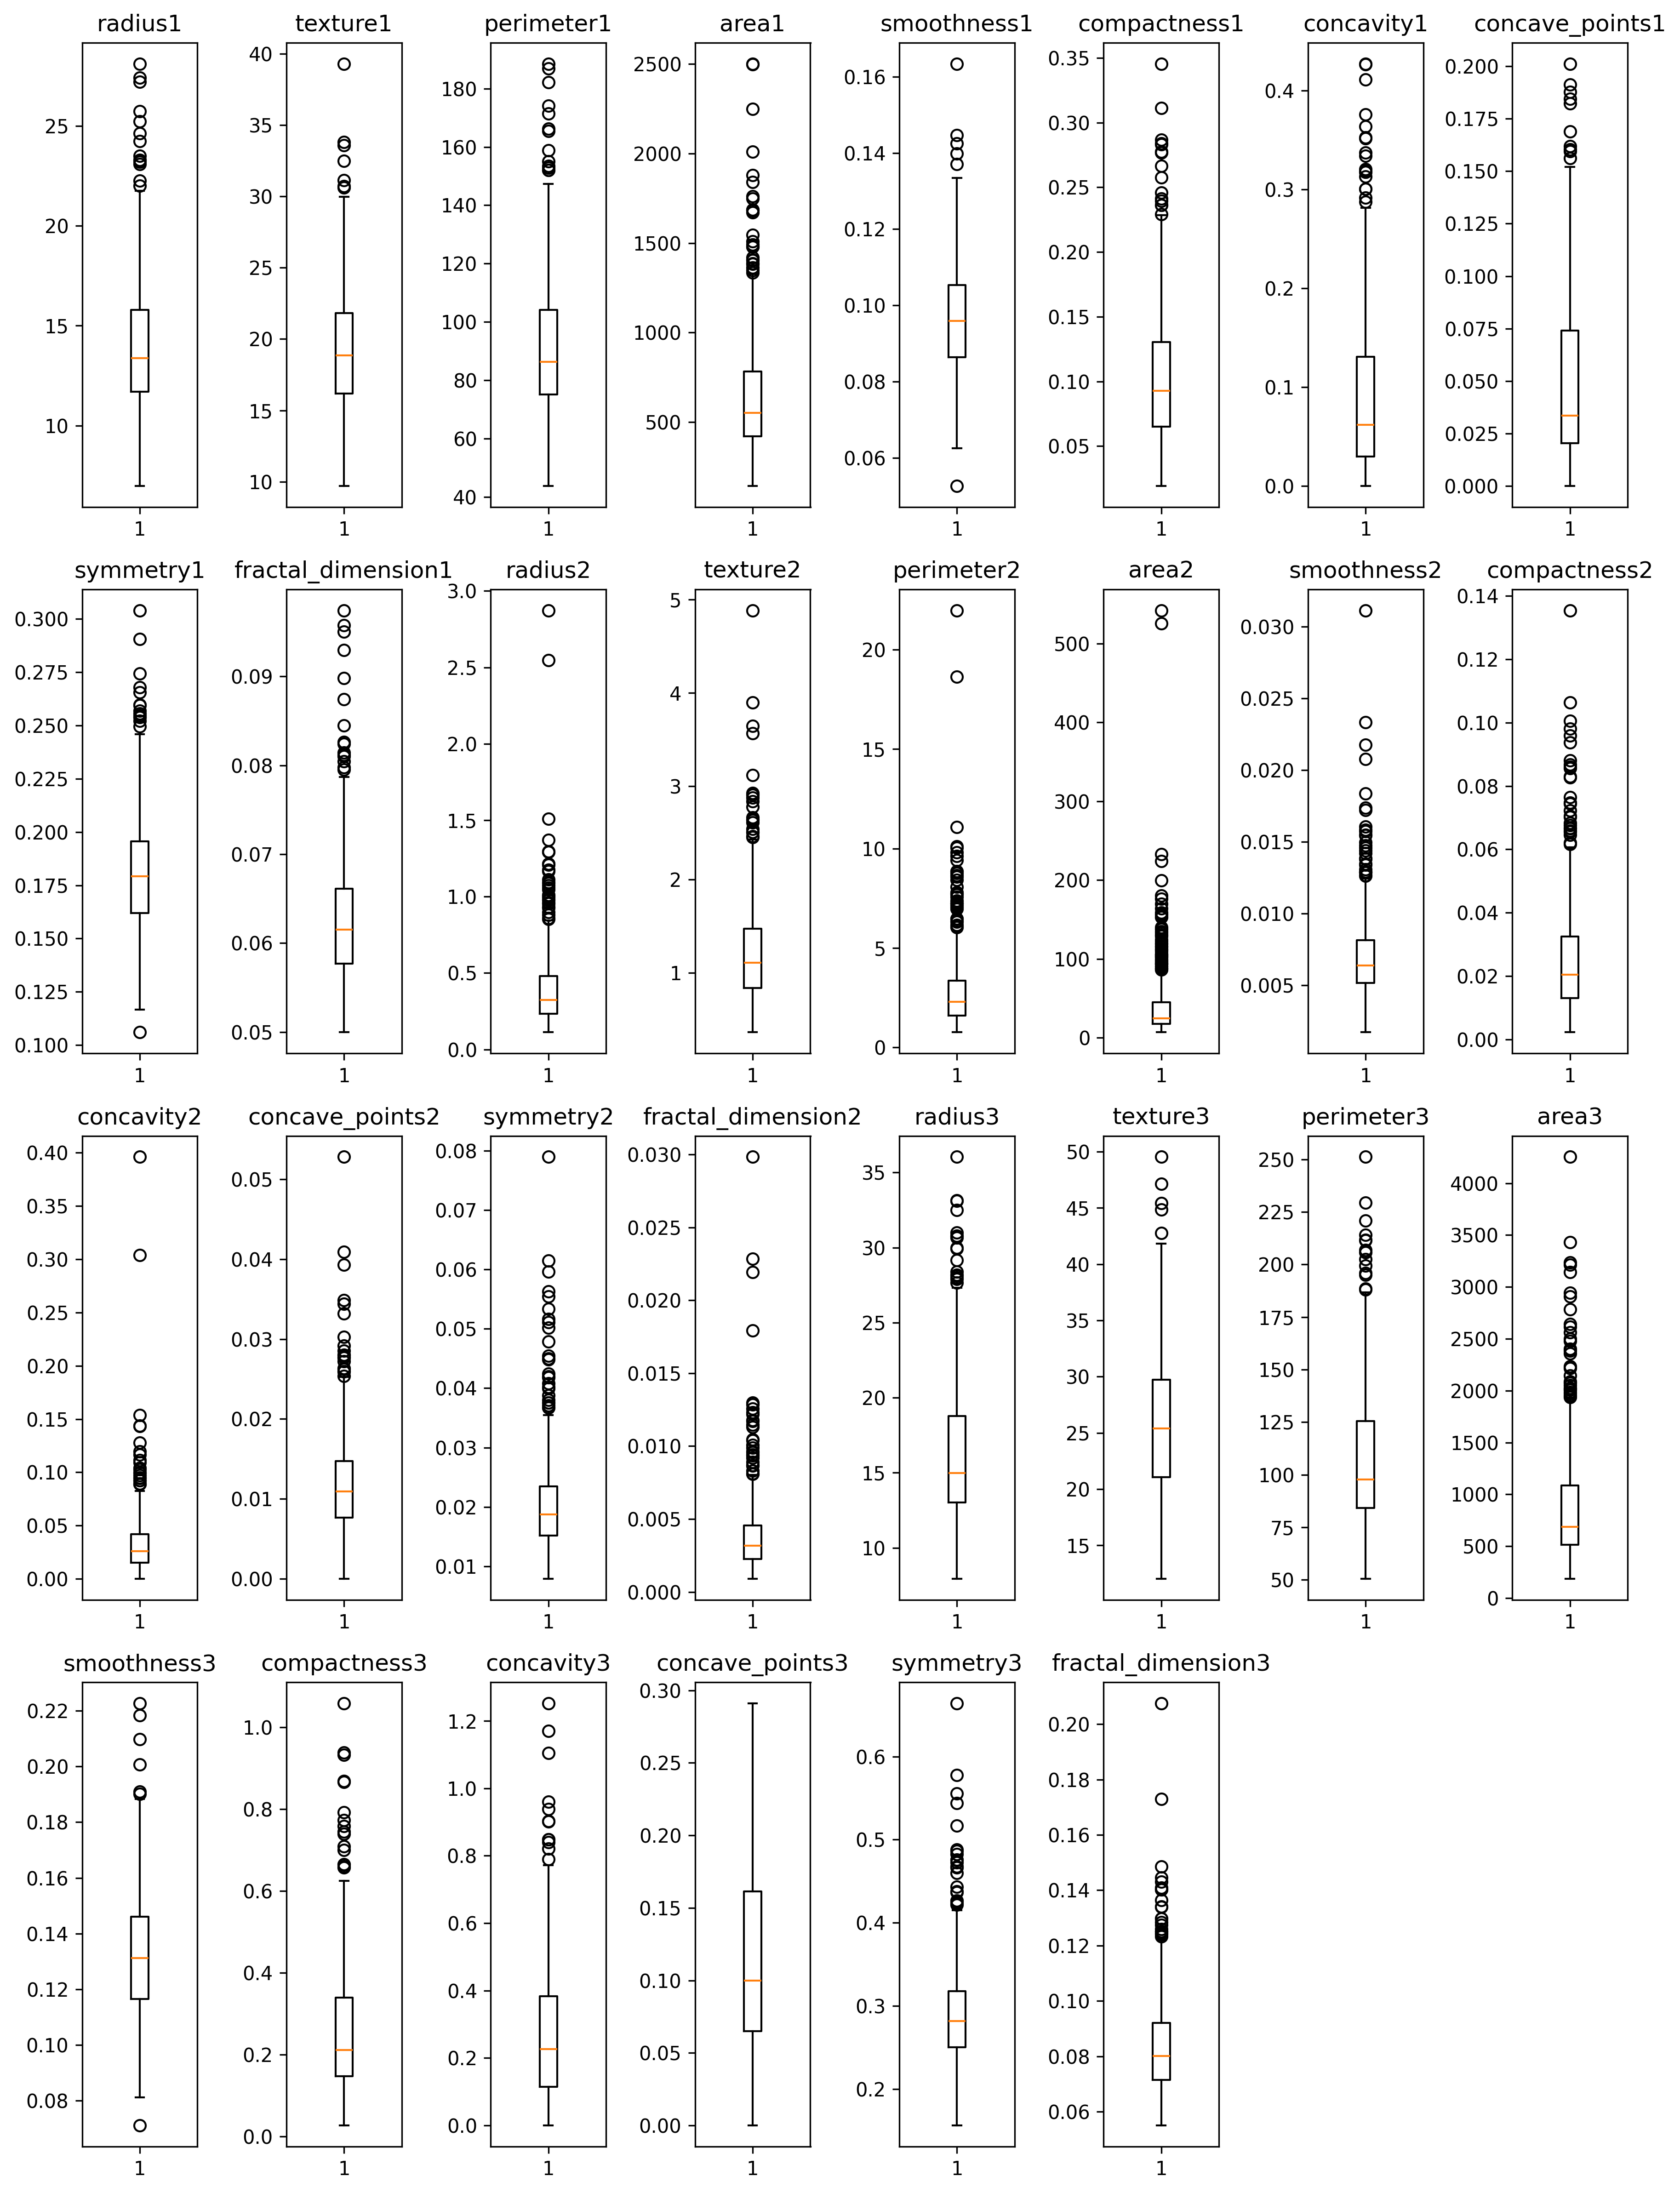

In [5]:
# Selecionando as colunas numéricas
quantitative_columns = X.select_dtypes(include=[np.number])

# Definindo o número de linhas e colunas para os subplots
n_cols = 8  # Número de colunas que você quer
n_rows = int(np.ceil(len(quantitative_columns.columns) / n_cols))  # Calculando o número de linhas

plt.figure(figsize=(12, 4 * n_rows), dpi=300)  # Ajustando a altura da figura

# Criando os subplots
for i, col in enumerate(quantitative_columns.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Adicionando um subplot
    plt.boxplot(quantitative_columns[col])
    plt.title(col)  # Título para cada boxplot

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Correlações das variáveis com suas "versões"

In [8]:
correlation_radius = X[['radius1', 'radius2', 'radius3']].corr()
correlation_texture = X[['texture1', 'texture2', 'texture3']].corr()
correlation_perimeter = X[['perimeter1', 'perimeter2', 'perimeter3']].corr()
correlation_area = X[['area1', 'area2', 'area3']].corr()
correlation_smoothness = X[['smoothness1', 'smoothness2', 'smoothness3']].corr()
correlation_compactness = X[['compactness1', 'compactness2', 'compactness3']].corr()
correlation_concavity = X[['concavity1', 'concavity2', 'concavity3']].corr()
correlation_concave_points = X[['concave_points1', 'concave_points2', 'concave_points3']].corr()
correlation_symmetry = X[['symmetry1', 'symmetry2', 'symmetry3']].corr()
correlation_fractal_dimension = X[['fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3']].corr()

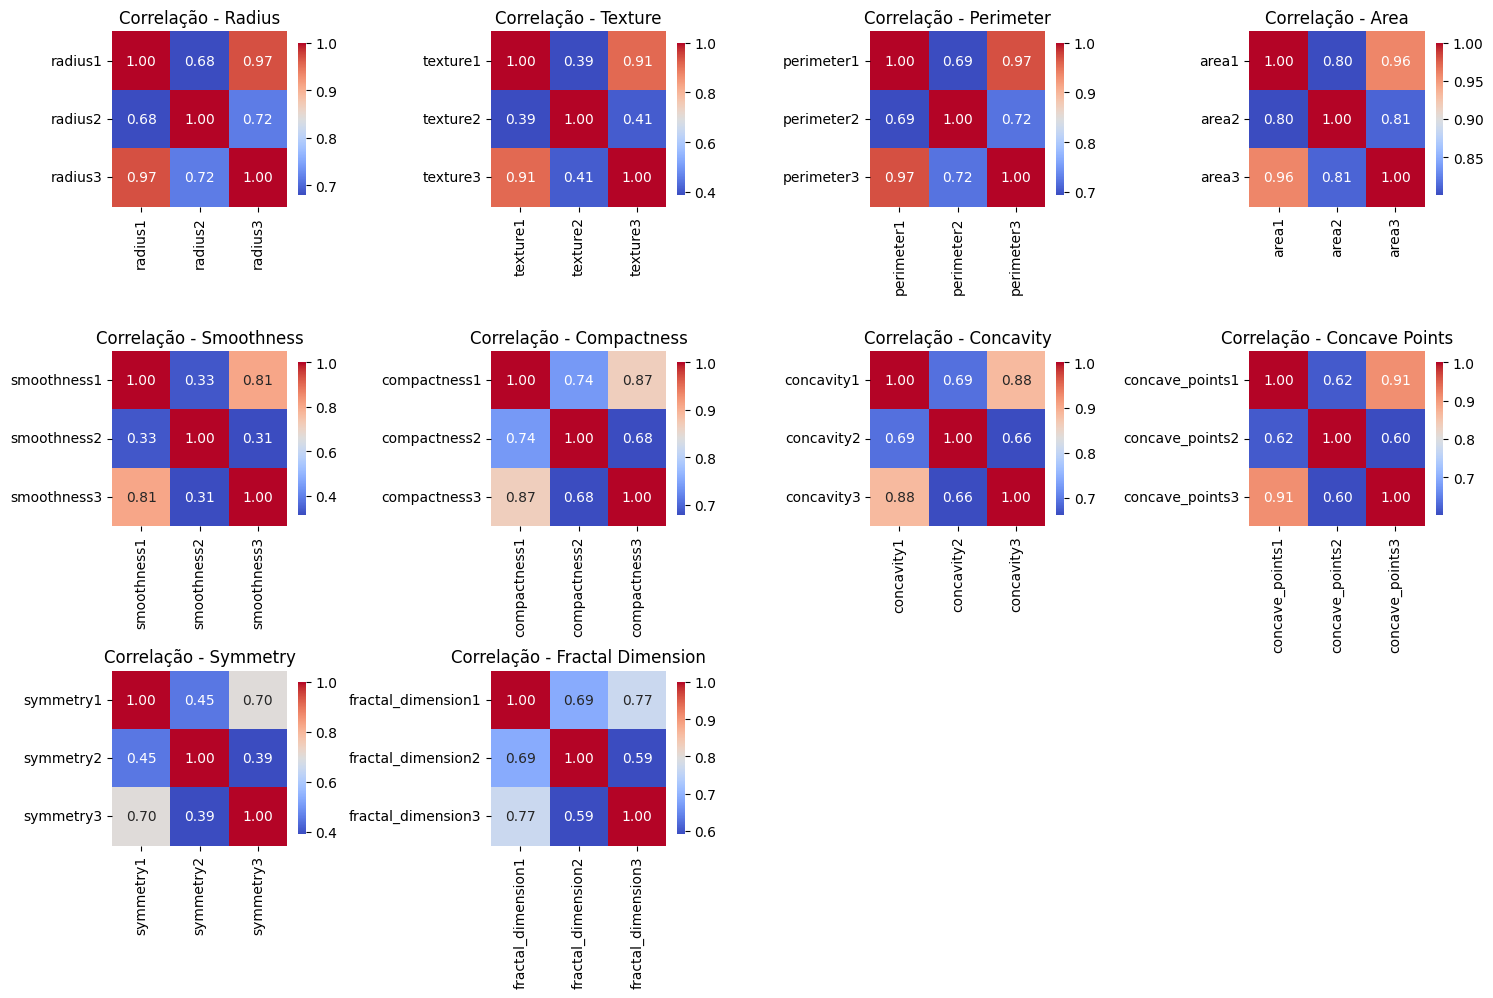

In [9]:
# Criar um gráfico para cada correlação
correlations = {
    "Radius": correlation_radius,
    "Texture": correlation_texture,
    "Perimeter": correlation_perimeter,
    "Area": correlation_area,
    "Smoothness": correlation_smoothness,
    "Compactness": correlation_compactness,
    "Concavity": correlation_concavity,
    "Concave Points": correlation_concave_points,
    "Symmetry": correlation_symmetry,
    "Fractal Dimension": correlation_fractal_dimension,
}

# Plotar as correlações
plt.figure(figsize=(15, 10))
for i, (name, corr_matrix) in enumerate(correlations.items()):
    plt.subplot(3, 4, i + 1)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title(f'Correlação - {name}')
    plt.xticks(rotation=90)  # Rótulos do eixo x (embaixo) em vertical
    plt.yticks(rotation=0)   # Rótulos do eixo y (lado) em horizontal
plt.tight_layout()
plt.show()

### Trazendo a variável "y" para nosso banco de dados e separando as tabelas entre as versões para criação de modelos distintos

In [11]:
X["Diagnosis"] = y["Diagnosis"]
X['Diagnosis'] = X['Diagnosis'].map({'M': 1, 'B': 0})


X1 = X[["radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1","concave_points1","symmetry1","fractal_dimension1"]]
X1["Diagnosis"] = y["Diagnosis"]
X1['Diagnosis'] = X1['Diagnosis'].map({'M': 1, 'B': 0})

X2 = X[["radius2","texture2","perimeter2","area2","smoothness2","compactness2","concavity2","concave_points2","symmetry2","fractal_dimension2"]]
X2["Diagnosis"] = y["Diagnosis"]
X2['Diagnosis'] = X2['Diagnosis'].map({'M': 1, 'B': 0})

X3 = X[["radius3","texture3","perimeter3","area3","smoothness3","compactness3","concavity3","concave_points3","symmetry3","fractal_dimension3"]]
X3["Diagnosis"] = y["Diagnosis"]
X3['Diagnosis'] = X3['Diagnosis'].map({'M': 1, 'B': 0})


C:\Users\Cliente\AppData\Local\Temp\ipykernel_1908\2215667853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Diagnosis"] = y["Diagnosis"]
C:\Users\Cliente\AppData\Local\Temp\ipykernel_1908\2215667853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Diagnosis'] = X['Diagnosis'].map({'M': 1, 'B': 0})
C:\Users\Cliente\AppData\Local\Temp\ipykernel_1908\2215667853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

### Primeiro modelo, em conjunto com sua versão em stepwise e predição

In [12]:
#%%


# Definição da fórmula utilizada no modelo
lista_colunasX1 = list(X1.drop(columns=['Diagnosis']).columns)
formula_modeloX1 = ' + '.join(lista_colunasX1)
formula_modeloX1 = "Diagnosis ~ " + formula_modeloX1



# O modelo a seguir também pode ser estimado por meio da função 'smf.glm'
#('statsmodels.formula.api')

modelo_X1 = sm.Logit.from_formula(formula_modeloX1,
                                          X).fit()

# Parâmetros do 'modelo_challenger'
modelo_X1.summary()

Optimization terminated successfully.
         Current function value: 0.128410
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.8055
Time:                        13:13:11   Log-Likelihood:                -73.065
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.282e-123
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.3595     12.853     -0.573      0.567     -32.550      17.831
radius1               -2.0493      3.716     -0.551      0.581      -9.332       5.234
texture1               0.3847      0.065      5.961      0.000       0.258       0.511
perimeter1            -0.0715      0.505     -0.142      0.887      -1.062       0.919
area1                  0.0398      0.017      2.377      0.017       0.007       0.073
smoothness1           76.4323     31.955      2.392      0.017      13.802     139.063
compactness1          -1.4624     20.342     -0.072      0.943     -41.333      38.408
concavity1             8.4687      8.120      1.043      0.297      -7.446      24.384
concave_points1       66.8218     28.529      2.342      0.019      10.906     122.738
symmetry1             16.2782     10.631      1.531      0.126      -4.557      37.114
fractal_dimension1   -68.3370     85.557     -0.799      0.424    -236.025      99.351
======================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
#%%
# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
step_X1 = stepwise(modelo_X1, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Diagnosis ~ Q('radius1') + Q('texture1') + Q('perimeter1') + Q('area1') + Q('smoothness1') + Q('compactness1') + Q('concavity1') + Q('concave_points1') + Q('symmetry1') + Q('fractal_dimension1')
Optimization terminated successfully.
         Current function value: 0.128410
         Iterations 11

 Discarding atribute "Q('compactness1')" with p-value equal to 0.9426894427534279 

Estimating model...: 
 Diagnosis ~ Q('radius1') + Q('texture1') + Q('perimeter1') + Q('area1') + Q('smoothness1') + Q('concavity1') + Q('concave_points1') + Q('symmetry1') + Q('fractal_dimension1')
Optimization terminated successfully.
         Current function value: 0.128414
         Iterations 11

 Discarding atribute "Q('perimeter1')" with p-value equal to 0.7749692336072747 

Estimating model...: 
 Diagnosis ~ Q('radius1') + Q('texture1') + Q('area1') + Q('smoothness1') + Q('concavity1') + Q('concave_points1') + Q('symmetry1') + Q('fractal_dimension1')
Optim

In [15]:
X1['phat'] = step_X1.predict()
X1

C:\Users\Cliente\AppData\Local\Temp\ipykernel_1908\541408022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['phat'] = step_X1.predict()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,Diagnosis,phat
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1,0.999978
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1,0.999994
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1,1.000000
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1,0.989110
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1,1.000000
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1,1.000000
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1,0.995022
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1,1.000000


### Script para criação da Matriz de Confusão

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.title('Matriz de confusão modelo combinado - cutoff de 0.2')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    # Visualização dos principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

### Matriz de Confusão da versão 1 com cutoff de 0,2 para maximizar a Sensitividade

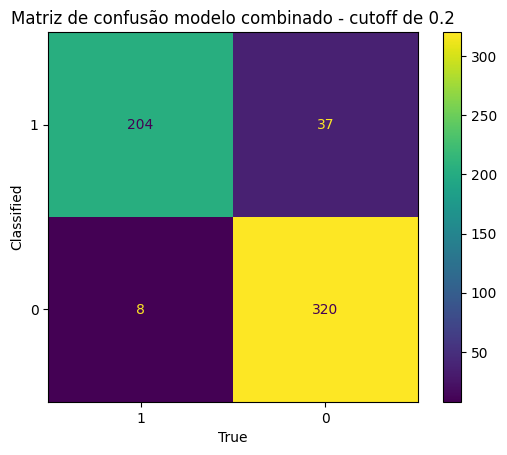

,Sensitividade,Especificidade,Acurácia
0,0.962264,0.896359,0.920914


In [17]:
matriz_confusao(observado=X1['Diagnosis'],
                predicts=X1['phat'], 
                cutoff=0.2)

### Criação do Modelo 2 com seus respectivos passos até a predição

In [19]:
# Definição da fórmula utilizada no modelo
lista_colunasX2 = list(X2.drop(columns=['Diagnosis']).columns)
formula_modeloX2 = ' + '.join(lista_colunasX2)
formula_modeloX2 = "Diagnosis ~ " + formula_modeloX2



# O modelo a seguir também pode ser estimado por meio da função 'smf.glm'
#('statsmodels.formula.api')

modelo_X2 = sm.Logit.from_formula(formula_modeloX2,
                                          X).fit()

# Parâmetros do 'modelo_challenger'
modelo_X2.summary()

Optimization terminated successfully.
         Current function value: 0.233671
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.6461
Time:                        13:16:32   Log-Likelihood:                -132.96
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 5.468e-98
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.3922      0.636     -5.335      0.000      -4.638      -2.146
radius2              -28.2292      6.138     -4.599      0.000     -40.260     -16.199
texture2              -0.3339      0.423     -0.789      0.430      -1.163       0.495
perimeter2             0.0751      0.476      0.158      0.875      -0.858       1.008
area2                  0.3935      0.057      6.890      0.000       0.282       0.505
smoothness2            4.1996     98.694      0.043      0.966    -189.238     197.637
compactness2          57.2538     28.689      1.996      0.046       1.025     113.483
concavity2             3.6141     11.952      0.302      0.762     -19.810      27.039
concave_points2       39.7669     64.176      0.620      0.535     -86.015     165.549
symmetry2             -6.7619     30.459     -0.222      0.824     -66.460      52.936
fractal_dimension2  -318.7333    149.297     -2.135      0.033    -611.349     -26.117
======================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [20]:
#%%
# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
step_X2 = stepwise(modelo_X2, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Diagnosis ~ Q('radius2') + Q('texture2') + Q('perimeter2') + Q('area2') + Q('smoothness2') + Q('compactness2') + Q('concavity2') + Q('concave_points2') + Q('symmetry2') + Q('fractal_dimension2')
Optimization terminated successfully.
         Current function value: 0.233671
         Iterations 11

 Discarding atribute "Q('smoothness2')" with p-value equal to 0.9660590291183492 

Estimating model...: 
 Diagnosis ~ Q('radius2') + Q('texture2') + Q('perimeter2') + Q('area2') + Q('compactness2') + Q('concavity2') + Q('concave_points2') + Q('symmetry2') + Q('fractal_dimension2')
Optimization terminated successfully.
         Current function value: 0.233673
         Iterations 11

 Discarding atribute "Q('perimeter2')" with p-value equal to 0.877891571333294 

Estimating model...: 
 Diagnosis ~ Q('radius2') + Q('texture2') + Q('area2') + Q('compactness2') + Q('concavity2') + Q('concave_points2') + Q('symmetry2') + Q('fractal_dimension2')
Optim

In [21]:
X2['phat'] = step_X2.predict()

X2

C:\Users\Cliente\AppData\Local\Temp\ipykernel_1908\2328676162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['phat'] = step_X2.predict()


,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,Diagnosis,phat
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,1,1.000000
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,1,0.999972
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,1,0.999999
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,1,0.010786
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,1,0.999997
...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,1,1.000000
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,1,1.000000
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,1,0.987144
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,1,0.999997


### Matriz de Confusão do Modelo 2 com cutoff de 0,2

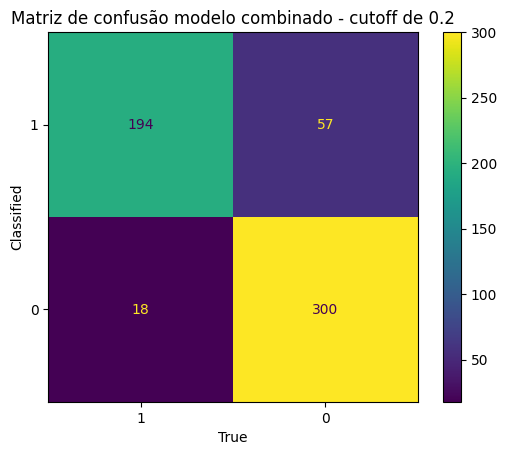

,Sensitividade,Especificidade,Acurácia
0,0.915094,0.840336,0.86819


In [22]:
# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=X2['Diagnosis'],
                predicts=X2['phat'], 
                cutoff=0.2)

### Criação do Modelo 3 com respectivos passos até a predição

In [23]:
# Definição da fórmula utilizada no modelo
lista_colunasX3 = list(X3.drop(columns=['Diagnosis']).columns)
formula_modeloX3 = ' + '.join(lista_colunasX3)
formula_modeloX3 = "Diagnosis ~ " + formula_modeloX3



# O modelo a seguir também pode ser estimado por meio da função 'smf.glm'
#('statsmodels.formula.api')

modelo_X3 = sm.Logit.from_formula(formula_modeloX3,
                                          X).fit()

# Parâmetros do 'modelo_challenger'
modelo_X3.summary()

Optimization terminated successfully.
         Current function value: 0.073433
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.8888
Time:                        13:17:42   Log-Likelihood:                -41.784
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.930e-137
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -29.0015     13.495     -2.149      0.032     -55.451      -2.552
radius3               -0.5354      1.531     -0.350      0.727      -3.536       2.465
texture3               0.2825      0.060      4.705      0.000       0.165       0.400
perimeter3             0.0130      0.128      0.101      0.919      -0.239       0.265
area3                  0.0188      0.015      1.282      0.200      -0.010       0.047
smoothness3           53.9434     21.880      2.465      0.014      11.059      96.828
compactness3          -8.3172      8.448     -0.985      0.325     -24.874       8.240
concavity3             4.5799      3.372      1.358      0.174      -2.029      11.188
concave_points3       37.5487     16.156      2.324      0.020       5.884      69.213
symmetry3              9.6223      5.847      1.646      0.100      -1.838      21.082
fractal_dimension3    -7.8746     49.292     -0.160      0.873    -104.486      88.737
======================================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [24]:
# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
step_X3 = stepwise(modelo_X3, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Diagnosis ~ Q('radius3') + Q('texture3') + Q('perimeter3') + Q('area3') + Q('smoothness3') + Q('compactness3') + Q('concavity3') + Q('concave_points3') + Q('symmetry3') + Q('fractal_dimension3')
Optimization terminated successfully.
         Current function value: 0.073433
         Iterations 11

 Discarding atribute "Q('perimeter3')" with p-value equal to 0.9194042254137968 

Estimating model...: 
 Diagnosis ~ Q('radius3') + Q('texture3') + Q('area3') + Q('smoothness3') + Q('compactness3') + Q('concavity3') + Q('concave_points3') + Q('symmetry3') + Q('fractal_dimension3')
Optimization terminated successfully.
         Current function value: 0.073442
         Iterations 11

 Discarding atribute "Q('fractal_dimension3')" with p-value equal to 0.8378184714809642 

Estimating model...: 
 Diagnosis ~ Q('radius3') + Q('texture3') + Q('area3') + Q('smoothness3') + Q('compactness3') + Q('concavity3') + Q('concave_points3') + Q('symmetry3')
Opt

In [25]:
X3['phat'] = step_X3.predict()

X3

C:\Users\Cliente\AppData\Local\Temp\ipykernel_1908\658150626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['phat'] = step_X3.predict()


,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis,phat
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1,1.000000
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1,1.000000
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1,1.000000
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1,0.992490
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1,0.999892
...,...,...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1,1.000000
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1,1.000000
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1,0.996761
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1,1.000000


### Matriz de Confusão do Modelo 3 com cutoff de 0,2

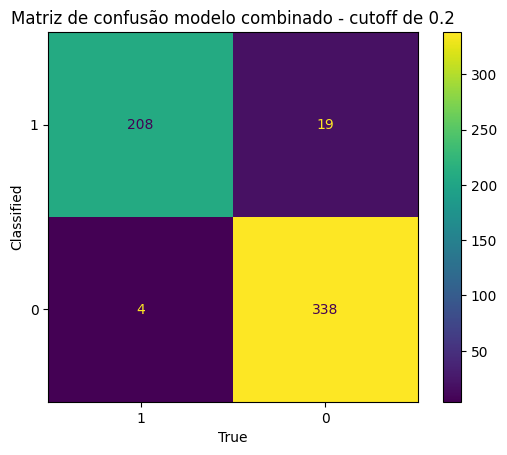

,Sensitividade,Especificidade,Acurácia
0,0.981132,0.946779,0.959578


In [26]:
# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=X3['Diagnosis'],
                predicts=X3['phat'], 
                cutoff=0.2)

### Criando um dataset combinado com a versão 2 e 3

In [27]:
X_combinado = X.drop(["radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1","concave_points1","symmetry1","fractal_dimension1"],axis=1)

### Criação do modelo com datasets combinados, seguindo os respectivos passos até a predição final

In [28]:
lista_colunasX_combinado = list(X_combinado.drop(columns=['Diagnosis']).columns)
formula_modeloX_combinado = ' + '.join(lista_colunasX_combinado)
formula_modeloX_combinado = "Diagnosis ~ " + formula_modeloX_combinado



# O modelo a seguir também pode ser estimado por meio da função 'smf.glm'
#('statsmodels.formula.api')

modelo_X_combinado = sm.Logit.from_formula(formula_modeloX_combinado,
                                          X).fit()

# Parâmetros do 'modelo_challenger'
modelo_X_combinado.summary()

Optimization terminated successfully.
         Current function value: 0.040273
         Iterations 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      548
Method:                           MLE   Df Model:                           20
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.9390
Time:                        13:19:55   Log-Likelihood:                -22.915
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.439e-136
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -71.1897     31.259     -2.277      0.023    -132.457      -9.923
radius2               39.6404     30.175      1.314      0.189     -19.502      98.782
texture2              -2.9546      1.925     -1.535      0.125      -6.728       0.819
perimeter2            -3.4595      2.720     -1.272      0.203      -8.790       1.871
area2                  0.0958      0.276      0.347      0.729      -0.446       0.638
smoothness2          422.4522    375.363      1.125      0.260    -313.246    1158.151
compactness2         169.8565    148.904      1.141      0.254    -121.991     461.704
concavity2          -126.0739     75.377     -1.673      0.094    -273.810      21.662
concave_points2      437.1846    349.984      1.249      0.212    -248.772    1123.141
symmetry2            -96.0047    143.436     -0.669      0.503    -377.133     185.124
fractal_dimension2 -2298.2771   1200.230     -1.915      0.056   -4650.684      54.130
radius3               -2.2597      3.852     -0.587      0.557      -9.809       5.289
texture3               0.6328      0.206      3.078      0.002       0.230       1.036
perimeter3             0.3994      0.389      1.026      0.305      -0.363       1.162
area3                  0.0121      0.032      0.379      0.705      -0.050       0.075
smoothness3           28.6001     53.220      0.537      0.591     -75.710     132.910
compactness3         -51.1066     26.622     -1.920      0.055    -103.286       1.072
concavity3            31.4470     14.135      2.225      0.026       3.742      59.152
concave_points3       41.7685     44.037      0.948      0.343     -44.542     128.079
symmetry3             23.8053     14.766      1.612      0.107      -5.136      52.746
fractal_dimension3   287.9958    152.801      1.885      0.059     -11.489     587.481
======================================================================================

Possibly complete quasi-separation: A fraction 0.74 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [29]:
# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
step_X_combinado = stepwise(modelo_X_combinado, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Diagnosis ~ Q('radius2') + Q('texture2') + Q('perimeter2') + Q('area2') + Q('smoothness2') + Q('compactness2') + Q('concavity2') + Q('concave_points2') + Q('symmetry2') + Q('fractal_dimension2') + Q('radius3') + Q('texture3') + Q('perimeter3') + Q('area3') + Q('smoothness3') + Q('compactness3') + Q('concavity3') + Q('concave_points3') + Q('symmetry3') + Q('fractal_dimension3')
Optimization terminated successfully.
         Current function value: 0.040273
         Iterations 19

 Discarding atribute "Q('area2')" with p-value equal to 0.7289286935454158 

Estimating model...: 
 Diagnosis ~ Q('radius2') + Q('texture2') + Q('perimeter2') + Q('smoothness2') + Q('compactness2') + Q('concavity2') + Q('concave_points2') + Q('symmetry2') + Q('fractal_dimension2') + Q('radius3') + Q('texture3') + Q('perimeter3') + Q('area3') + Q('smoothness3') + Q('compactness3') + Q('concavity3') + Q('concave_points3') + Q('symmetry3') + Q('fractal_dimension3')
O

In [30]:
X_combinado['phat'] = step_X_combinado.predict()

X_combinado

,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis,phat
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1,1.000000e+00
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1,1.000000e+00
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1,1.000000e+00
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1,9.999887e-01
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1,9.999998e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1,1.000000e+00
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1,1.000000e+00
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1,9.995170e-01
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1,1.000000e+00


### Matriz de Confusão do melhor modelo com cutoff de 0,2

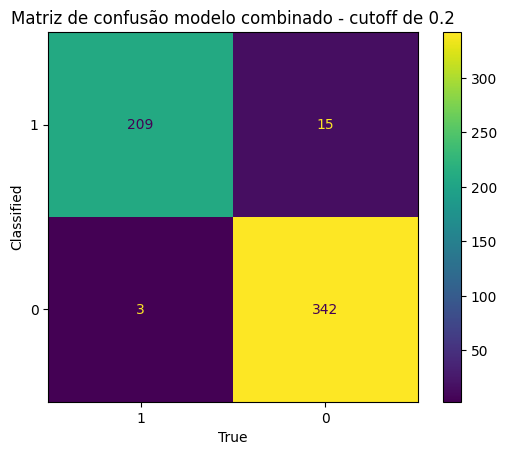

,Sensitividade,Especificidade,Acurácia
0,0.985849,0.957983,0.968366


In [31]:
matriz_confusao(observado=X_combinado['Diagnosis'],
                predicts=X_combinado['phat'], 
                cutoff=0.2)

### Para finalizar, analisando a importância dos Betas no nosso modelo

In [32]:
step_X_combinado.params.sort_values(ascending=False)

Q('smoothness2')            488.630368
Q('fractal_dimension3')     188.644639
Q('concave_points3')         56.937907
Q('radius2')                 16.324417
Q('concavity3')              11.371471
Q('texture3')                 0.383538
Q('perimeter3')               0.217961
Q('compactness3')           -16.507708
Intercept                   -58.634399
Q('fractal_dimension2')   -1632.929447
dtype: float64